# Control de Poblaciones de Insectos al Introducir Insectos Estériles

### Sofía C.
### Daniel M.
### Pablo R.

$$
N_{t+1}=\frac{R N_t^2}{(R-1)\frac{N_t^2}{M}+N_t+S}
$$

En 1937, E. F. Knipling, propuso la Técnica de Insectos Estériles (SIT, en inglés). La técnica no fue implementada haste 1958 sobre una plaga de  `screwworm` en EEUU usando métodos físicos y químicos para causar esterilidad. El método ha sido implementado en México o otros países de Sudamérica con éxito.

<img src="knipling.png" width="200">
<img src="worm.png" width="200">




Hasta años recientes SIT sigue siendo una técnica usada y estudiada en genética de poblaciones

* `Oliva, C., Damiens, D., Vreysen, M., Lempeiere, G., & Gilles, J. (2013). Reproductive strategies of aedes albopictus (diptera: Culicidae) and implications for the sterile insect technique. Plos One, 8(11), e78884. doi:10.1371/journal.pone.0078884`

* `Barnes, B. N., Hofmeyr, J. H., Groenewald, S., Conlong, D. E., & Wohlfarter, M. (2015). The sterile insect technique in agricultural crops in south africa: A metamorphosis …. but will it fly? African Entomology, 23(1), 1-18. doi:10.4001/003.023.0103`

* `Horner, R. M., Walker, J. T. S., Rogers, D. J., Lo, P. L., & Suckling, D. M. (2016). Use of the sterile insect technique in new zealand: Benefits and constraints. New Zealand Plant Protection, 69, 296-304.`



Basándonos en la ecuación propuesta por `Murray, J. D. (2001). Mathematical biology, part I: An introduction Springer.` Nuestra ecuación tenemos varios parámetros:

+ $N_t$ población al tiempo $t$
+ R Rapidez de crecimiento
+ S Número constante de individuos estériles
+ M Población convergente si $S=0$

In [4]:

using Plots, LaTeXStrings, TaylorSeries, Interact
include("AutomDiff_V2.jl")
import AD: Dual, xdual
pyplot()

Plots.PyPlotBackend()

In [7]:
f(x,α,β,γ) = (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x))

f (generic function with 1 method)

In [3]:
"""
Este código nos permite iterar una función f n veces dada una condición inicial x0. 
"""
function iteramapeo(f, x0, n)
    xx = [x0]
    fx = [0.0]
    for it = 1:n
        x1 = f(x0)
        push!(xx, x0)
        push!(fx, x1)
        x0 = x1
        push!(xx,x1)
        push!(fx,x1)
    end
    xx, fx
end

iteramapeo

In [4]:
#Aquí definimos el valor de los parámetros que utilizamos con la convención \alpha \equiv R, \beta \equiv M,
#\gamma \equiv S ```
α=500.0
β=10.0
γ=2.0
func = x -> f(x,α,β,γ)

(::#1) (generic function with 1 method)

In [6]:
xfin,ffin = iteramapeo(func,200.0,10);

Interact.Slider{Float64}(Signal{Float64}(100.0, nactions=0),"γ",100.0,0.0:1.0:200.0,".3f",true)


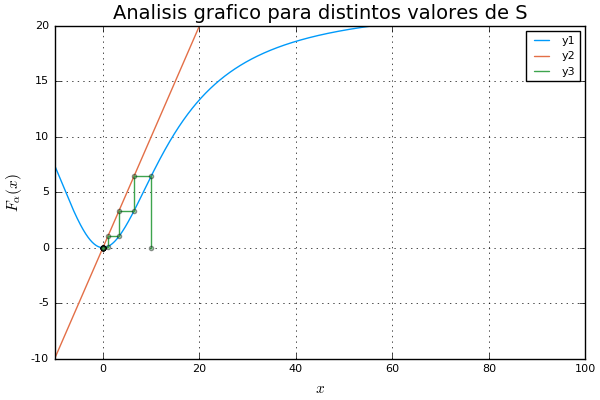

In [19]:
α = 10.0
β= 20.0
#``` Este código genera una gráfica interactiva del mapeo variando el parámetro \gamma.
#```
@manipulate for γ in 0:1.0:200
    pobla(x)=f(x,α,β,γ)
    xfin,ffin = iteramapeo(pobla,10.0,16); #Añade la condición inicial con la que se analiza el mapeo y 
    #su trayectoria, la función  definida un renglón arriba y el número de iteraciones.
    plot(-10:1/32:100, pobla, xaxis=(L"x", (-10.0, 100.0)), yaxis=(L"F_\alpha(x)",(-10.0,20.0))) # Hace la gráfica
    #con especificaciones para ejees.
    title!("Analisis grafico para distintos valores de S")
    plot!(-10:1/32:50, identity) #Grafica la identidad del análisis gráfico
    plot!(xfin, ffin, marker=(:dot, 3, 0.4)) #Señala dónde terminó la condición inicial dada
end

![Variando S](g1.png)

Aquí mostramos una gráfica del comportamiento temporal del mapeo cuando $S=0$ y se varía la condición inicial.

In [10]:
α = 10.0
β= 25.0
g(x,α,β)=(α*(x)^2)/((((α-1.0)*(x^2))/β + x)) #Define el mapeo con \gamma = 0

g (generic function with 1 method)

Interact.Slider{Float64}(Signal{Float64}(50.0, nactions=0),"i",50.0,0.0:1.0:100.0,".3f",true)


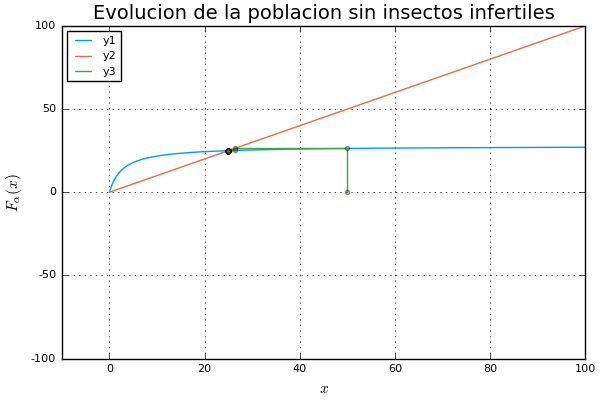

In [12]:
@manipulate for i in 0:1.0:100 #Este código realiza una gráfica interactiva que cambia la condición inicial
    # en cada paso entre 0 y 100 con los valores de \alpha y \beta dados anteriormente.
    poblaciones(i) = g(i,α,β)
    xfin,ffin = iteramapeo(poblaciones,i,20);
    plot(0:1/32:100, poblaciones, xaxis=(L"x", (-10.0,100.0)), yaxis=(L"F_\alpha(x)",(-100.0,100.0)))
    title!("Evolucion de la poblacion sin insectos infertiles")
    plot!(0:1/32:100, identity)
    plot!(xfin, ffin, marker=(:dot, 3, 0.4))
end

Vemos que en éste caso, la población total nunca muere, tal como se esperaba, pues no hay insectos infértiles en este caso.

Se resolvió la ecuación $N(x)-x=0$ para encontrar los puntos fijos del mapeo en términos de los parámetros R,S y M, obteniendo:

$X_{0}= 0$


y    



$X_{12}= \frac{\pm M(1-R)+\sqrt{R-1}\sqrt{M^{2}(1-R)-4MS}}{2(1-R)}$



Por lo que, para encontrar poblaciones estáticas distintas de cero, tenemos que se deben cumplir las siguientes condiciones:

$R> 1 $ ^ $M > \frac{4S}{R-1}$


In [11]:
using Roots

In [12]:
function puntofijo(F::Function, range) #Este código calcula los puntos fijos de una función F en un rango range.
    pf= fzeros(x -> (F(x) - x) , range)
    return pf
end 

puntofijo (generic function with 1 method)

In [13]:
α= 10.0
β= 25.0
γ= 50.0

F(x) = (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x)) #Se define la función con nuevos parámetros arbitrarios, pero que
#cumplen las condiciones mencionadas.


F (generic function with 1 method)

In [14]:
pf=puntofijo(F,[0,20.0]) #Se calculan los puntos fijos de éste mapeo.

3-element Array{Float64,1}:
  0.0    
  8.33333
 16.6667 

In [16]:
g(x)= (α*(x)^2)/((((α-1.0)*(x^2))/β + γ + x)) -x  #Se define el mapeo que nos permite estudiar la localización 
#de los puntos fijos al variar los parámetros.

g (generic function with 2 methods)

In [17]:
α= 10.0
β= 25.0
γ= 50.0
func=x -> g(x) #Se dan valores a los parámetros para realizar un ejemplo de sus puntos fijos.

(::#28) (generic function with 1 method)

A continuación se muestra una gráfica de los puntos fijos del mapeo en términos de los parámetros
$R=10$,$M=25$ y $S=50$.


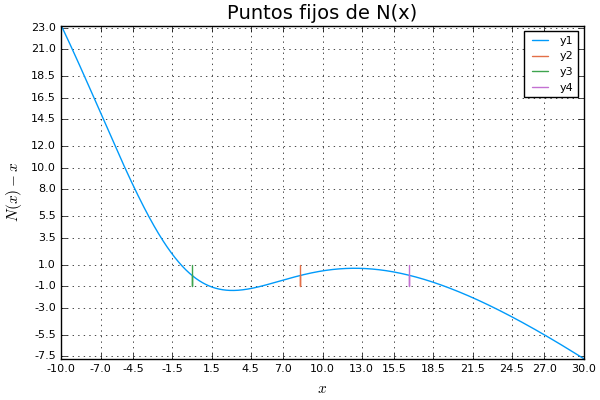

In [18]:
plot(-10:1/32:30, func,xticks=-10:0.5:100,yticks=-10:0.5:50) #Se grafica el mapeo N(X)-x
xlabel!(L"x")
ylabel!(L"N(x)-x")
title!("Puntos fijos de N(x)")
plot!([8.3,8.3], [1, -1, 0]) #Se marcan los puntos fijos sobre la gráfica.
plot!([0,0], [1, -1,0])
plot!([16.66,  16.66], [1, -1, 0])

A continuación se muestran graficas que relacionan los parámetros y el comportamiento de los puntos fijos dependiendo de éstos.

La función a estudiar es:

$N(X)-X= \frac{MRX^{2}}{(R-1)X^{2}+M(X+S)} -X $

 Nos interesa encontrar éste mapeo pues nos permite observar el comportamiento de los puntos fijos en función de los parámetros.

En primer lugar, estudiemos a los puntos fijos para distintas $M$ en cada gráfica en función de $R$ y $S$ para una condición inicial fija $X_{0}=10.0$. 

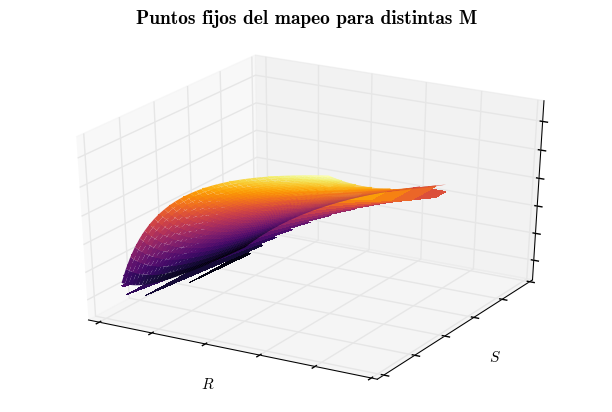

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [21]:
pyplot(leg=false, ticks=nothing) #Este código realiza una gráfica para cada valor de M entre 1 y 80
x = y = linspace(2.0, 40, 40) #Establece el paso entre cada x,y y sus valores máximo y mínimo.
zs = zeros(0,40)
x0= 10.0 #Condición inicial arbitraria
@gif for i in linspace(1, 80, 100) #Creando el .gif, con 100 imágenes.
    G(x,y) = (x*(x0)^2)/((((x-1.0)*(x0^2))/i + y + x0))-x0


plot(x, y, G, st = [:surface, :contourf],xaxis=(L"R",(-1.0, 50)),yaxis=(L"S",(-1.0, 50)),title="Puntos fijos del mapeo para distintas M")
        
   end

![Distintas M](M.gif)

Ahora estudiamos el comportamiento de los puntos fijos con un valor distinto de $R$ en cada gráfica que varía en función de $M$ y $S$.

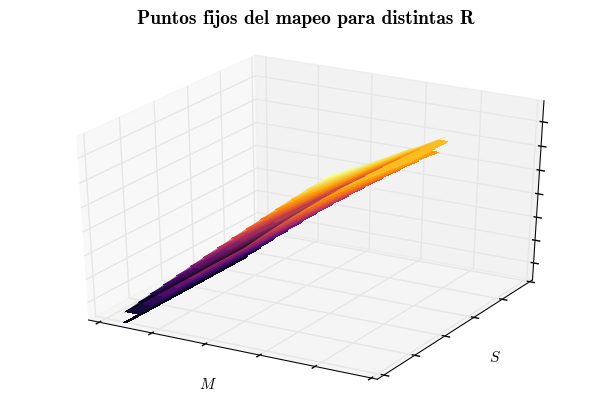

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [22]:
pyplot(leg=false, ticks=nothing) #Este código realiza una gráfica para cada valor de R entre 1 y 100.
x = y = linspace(2.0, 40, 40)
zs = zeros(0,40)
x0= 10.0
@gif for i in linspace(1,100,100) #Se genera el .gif con 100 imágenes. 
    G(x,y) = (i*(x0)^2)/((((i-1.0)*(x0^2))/x + y + x0))-x0
    title!(L"Puntos fijos del mapeo")
    p = plot(x, y, G, st = [:surface, :contourf],xaxis=(L"M",(-1.0, 50)),yaxis=(L"S",(-1.0, 50)),title="Puntos fijos del mapeo para distintas R")
        
 end

![Distintas R](R.gif)

Finalmente, observemos la evolución de los puntos fijos para un valor distinto de $S$ en cada gráfica que se encuentra en
función de $M$ y $R$.

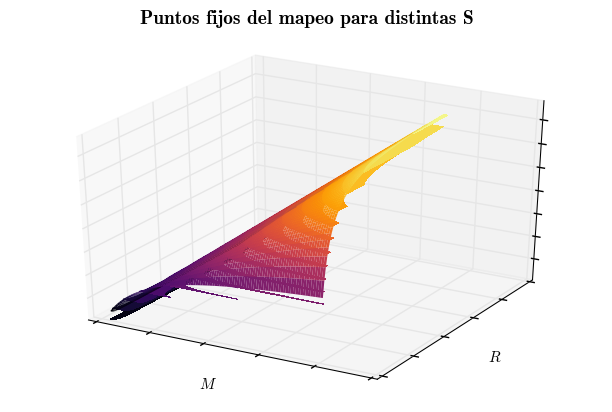

INFO: Saved animation to /home/juser/tmp.gif


Plots.AnimatedGif("/home/juser/tmp.gif")

In [33]:
pyplot(leg=false, ticks=nothing) #Este código genera una gŕafica para cada valor de S en función de M y R.
x = y = linspace(2.0, 80, 90)
zs = zeros(0,90)
x0= 50.0 #Se utiliza otra condición inicial.
@gif for i in linspace(1, 100, 100) #Se construye el .gif con 100 imágenes también.
    G(x,y) = (y*(x0)^2)/((((y-1.0)*(x0^2))/x + i + x0))-x0
    title!(L"Puntos fijos del mapeo")
    p = plot(x, y, G, st = [:surface, :contourf],xaxis=(L"M",(-1.0,100)),yaxis=(L"R",(-1.0, 100)),title="Puntos fijos del mapeo para distintas S")
        
end

![Distintas S](S.gif)

## Bifurcaciones

Una vez observado el comportamiento del mapeo en función de sus parámetros se prosiguió a encontrar para varios parámetros $R$ y $M$ el valor de $S$ para el cual la población desaparece

In [22]:
"""
    ciclosestables!(xx, f, nit, nout, cc)

Esta función itera el mapeo `f`, de una variable, `nit+nout` veces, 
usando como condición inicial `x0=0`; los últimos `nout` iterados 
actualizan al vector `xx` que tiene longitud `nout`. `cc` es el valor
del parámetro del mapeo `f`. El mapeo `f` debe ser definido de 
tal manera que `f(x0,cc)` tenga sentido. La idea es los últimos 
`nout` iterados reflejen los ciclos estables del mapeo `f`. 
"""
function ciclosestables!(xx, f, nit, nout, cc,x0)
    @assert nit > 0 && nout > 0
    
    # Primeros nit iterados
   
    for it = 1:nit
        x0 = f(x0, cc)
    end
    
    # Se guardan los siguientes nout iterados
    for it = 1:nout
        x0 = f(x0, cc)
        @inbounds xx[it] = x0
    end
    
    nothing
end

"""
    diagbifurc(f, nit, nout, crange)

Itera el mapeo `f` `nit+nout` veces y regresa una matriz
cuya columna `i` tiene los últimos `nout` iterados del mapeo
para el valor del parámetro del mapeo `crange[i]`.

La función `f` debe ser definida de tal manera que `f(x0, c)` 
tenga sentido.
"""
function diagbifurc(f, nit, nout, crange,x0)
    xx = Vector{Float64}(nout)
    ff = Array{Float64,2}(nout, length(crange))
    
    for ic in eachindex(crange)
        c = crange[ic]
        ciclosestables!(xx, f, nit, nout, c,x0)
        ff[:,ic] = xx
    end
    
    return ff
end



diagbifurc


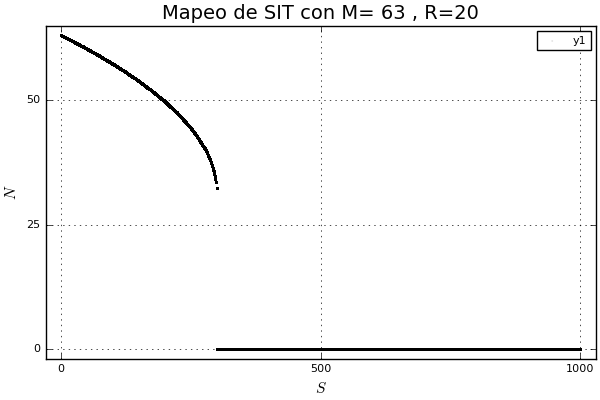

In [29]:
Ict(x,m, r,s) = (r*x^2)/((r-1)*x^2/m + x + s)

M=63
R=20
Ict1(x,s) = Ict(x,M,R,s)

crange = 0:1000

ff = diagbifurc(Ict1, 1000, 256, crange,50); 
cc = ones(size(ff)[1])*crange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
ff = reshape(ff, size(ff)[1]*size(ff)[2]);
cc = reshape(cc, size(ff));

scatter(cc, ff, markersize= 0.05)
xlabel!(L"S")
ylabel!(L"N")
title!("Mapeo de SIT con M= 63 , R=20")

<img src="mapeo.png" width="600">

In [24]:
function intermap(M, R)
    m1(x, s) = mapins(x, M, s, R)
    srange = 0:2500.0
    #map1 = mapeo_liap_all(srange, m1, 1000.0)
    ff = diagbifurc(m1, 300, 10, srange, 1000); 
    cc = ones(size(ff)[1])*srange';

# Esto cambia las matrices en vectores; ayuda un poco para los dibujos
    ff = reshape(ff, size(ff)[1]*size(ff)[2]);
    cc = reshape(cc, size(ff));
    return ff, cc
end
#Mapeo
mapins(x, M, S, R) = (R*x^2)/((R - 1)*(x^2)/M + S + x)

mapins (generic function with 1 method)

Interact.Slider{Int64}(Signal{Int64}(50, nactions=0),"M",50,1:100,"d",true)

Interact.Slider{Float64}(Signal{Float64}(50.5, nactions=0),"R",50.5,1.1:0.1:100.0,".3f",true)


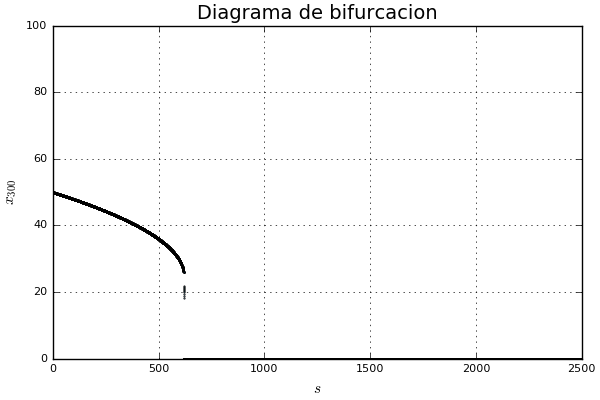

In [25]:
@manipulate for M in 1:100, R in 1.1:0.1:100
    ff, cc = intermap(M, R)
    scatter(cc, ff, markersize= 0.5, legend = :false, title ="Diagrama de bifurcacion", xlabel =L"s", ylabel =L"x_{300}")
    xlims!(0, 2500)
    ylims!(0, 100)
end

También hacemos el análisis del exponenete de Lyapunov

In [28]:
doc"""
    iterado(F,x0,n)

Dado un punto $x_0$, esta funció guarda a todas la iteraciones bajo $F$ en un arreglo.
"""

function iterado(F::Function,x0::Float64,n::Int)
    y = Float64[x0] ##El primer elemento es x_0
    x = x0
    for i in 1:n
        x=F(x) #El valor de x cambia con cada iteración
        push!(y,x) #Este nuevo valor se guarda en el arreglo
    end
    y
end

doc"""
    Lyapunov(y, F)

Dado un punto un arreglo que contenga todas las iteraciones bajo $F$ de $x_0$, calcula 
$\frac{1}{n} \sum_{i=1}^n \log\Big| \, f'(x_i)\, \Big|.$
"""

function Lyapunov(y, F::Function)
    n = length(y)
    l = 0
   
    for i in 1:n
        x = abs((F(xdual(y[i]))).der)
        l = l + log(x)
       
    end
    l/n
end

doc"""
mapeo_liap_all(crange::FloatRange, Qc::Function, x0::Float64, n = 100000)

Calcula el exponente de Lyapunov para un mapeo paramétrico $Q_c = Q_c(x, c)$ en un rango de parámetros `crange`, un
valor inicial `x0` y `n` iteraciones.
"""

function mapeo_liap_all(crange::FloatRange, Qc::Function, x0::Float64, n = 100000)
    mapeo = Float64[]
  
    for i in crange
        Qci(x) = Qc(x,i) 
        y = iterado(Qci,x0,n)
        l = Lyapunov(y, Qci)
        if abs(l)<Inf #En algunos puntos labda diverge, por lo que si tiende a infinito, se la asigna el valor-2.5
            push!(mapeo,l)      
        else
            push!(mapeo,0.0)       
        end
      
    end
    mapeo
end

mapeo_liap_all


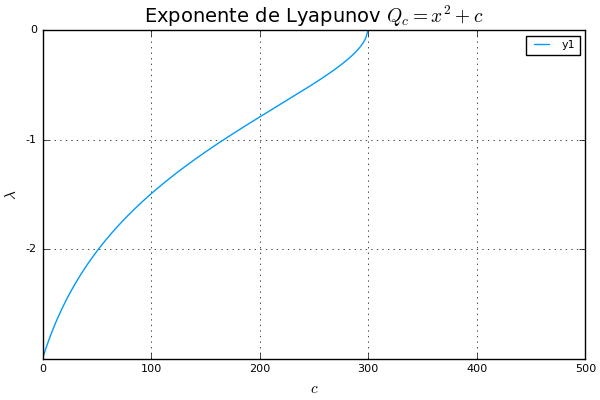

In [30]:
crange = 0.0:1:500
mapeo= mapeo_liap_all(crange,Ict1,1000.0);
p = plot(crange,mapeo)

xlabel!(L"c")
ylabel!(L"\lambda")
title!(L"Exponente de Lyapunov $Q_c = x^2 +c$")

<img src="liap.png" width="600">

Vemos cómo el rompimiento es un punto de bifurcación ya que $\lambda = 0$

Por último, se encontró a $S_c$ como función de $M$ y $R$, para esto empleamos el dominio $M\times R = [1,100]\times[1.1,100]$

In [ ]:
function iteram(M1::Range, R1::Range)
    P, Q = length(R1), length(M1)
    Mat1 = zeros(P, Q) 
    K = Int(P*Q)
    n = 1
    #@show (P, Q)
    for j in 1:Q
        for i in 1:P
            if mod(100n/K, 5) == 0
                println(100n/K, "%")
            end
            #@show i, j
            M, R = M1[j], R1[i]
            m1(x, s) = mapins(x, M, s, R)
            srange = 0:3_000.0
            #map1 = mapeo_liap_all(srange, m1, 1000.0)
            ff = diagbifurc(m1, 300, 50, srange, 1000); 
            cc = ones(size(ff)[1])*srange';
            
            # Esto cambia las matrices en vectores; ayuda un poco para los dibujos
            ff = reshape(ff, size(ff)[1]*size(ff)[2]);
            cc = reshape(cc, size(ff));
            for l in eachindex(ff)
                if ff[l] == 0
                    Mat1[i, j] = cc[l]
                    break
                end
            end
            n += 1
        end
    end

    mm = ones(size(Mat1)[1])*M1'
    rr = R1*ones(size(Mat1)[2])'
    A1 = reshape(Mat1, size(Mat1)[1]*size(Mat1)[2])
    mm1 = reshape(mm, size(A1)[1])
    rr1 = reshape(rr, size(A1)[1])
    return mm1, rr1, A1
end

Con esto hemos hecho un mapeo preliminar con $M=1:50$ , $R=1:40$. Vemos el siguente comportamiento para "cortes" a R constante

In [20]:
MS = readcsv("M1.csv")
Rrange = 5:40;

In [13]:
plot(MS[1:10,1:5])
xlabel!(L"M")
ylabel!(L"N")
title!("Cortes a R=cte");

<img src="rcte.png" width="600">

In [ ]:
scatter(MS[1,:])
scatter!(MS[2,:])
scatter!(MS[3,:])
scatter!(MS[4,:])
xlabel!(L"R")
ylabel!(L"N")
title!("Cortes a M=cte");

<img src="mcte.png" width="600">

Vemos un comportamiento de agrupación en 4. Para indagar más en esto buscamos los puntos donde hay una crecimiento constante de $S_c$

In [21]:

dif=MS
    for j in 1:length(MS[:,1])-1 #fixed r
        dif[j,:]= MS[j+1,:]-MS[j,:]
end

dif
dif[end,:]= dif[end-1,:]
steadyR = Float64[]
steapR = Float64[]
for i in 1:36
    u = unique(dif[:,i])
    if length(u)==1
        push!(steadyR,Rrange[i])
        push!(steapR,u[1])
    end
end
steadyR,steapR

([5.0,9.0,13.0,17.0,21.0,25.0,29.0,33.0,37.0],[1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0])

In [23]:
MS = readcsv("M1.csv")
Rrange = 5:40;
dif2=MS
    for j in 1:length(MS[1,:])-1 #fixed m
        dif2[:,j]=  MS[:,j+1]-MS[:,j]
end

dif2
dif[:,end]= dif[:,end-1]
steadyM = Float64[]
steapM = Float64[]
for i in 1:50
    u = unique(dif[i,:])
    if length(unique(dif[i,:]))==1
        push!(steadyM,i)
        push!(steapM,u[1])
    end
end
steadyM,steapM

(Float64[],Float64[])

In [31]:
mm = readcsv("DatosPlano/mms2.csv")[:,1]
rr = readcsv("DatosPlano/rrs2.csv")[:,1]
cs = readcsv("DatosPlano/ccs2.csv")[:,1];
append!(mm, readcsv("DatosPlano/mms3.csv")[:,1])
append!(rr, readcsv("DatosPlano/rrs3.csv")[:,1])
append!(cs, readcsv("DatosPlano/ccs3.csv")[:,1]);
append!(mm, readcsv("DatosPlano/mms1.csv")[:,1])
append!(rr, readcsv("DatosPlano/rrs1.csv")[:,1])
append!(cs, readcsv("DatosPlano/ccs1.csv")[:,1]);

LoadError: LoadError: SystemError: opening file DatosPlano/mms2.csv: No such file or directory
while loading In[31], in expression starting on line 1

In [ ]:
plot(mm, rr, cs, st = :surface)
xlabel!("M")
ylabel!("R")

In [ ]:
using Plots
plotlyjs()

In [ ]:
mm = readcsv("DatosPlano/mms2.csv")[:,1]
rr = readcsv("DatosPlano/rrs2.csv")[:,1]
cs = readcsv("DatosPlano/ccs2.csv")[:,1];
append!(mm, readcsv("DatosPlano/mms3.csv")[:,1])
append!(rr, readcsv("DatosPlano/rrs3.csv")[:,1])
append!(cs, readcsv("DatosPlano/ccs3.csv")[:,1]);
append!(mm, readcsv("DatosPlano/mms1.csv")[:,1])
append!(rr, readcsv("DatosPlano/rrs1.csv")[:,1])
append!(cs, readcsv("DatosPlano/ccs1.csv")[:,1]);

In [ ]:
plot(mm, rr, cs)
xlabel!("M")
ylabel!("R")